# Table of Contents

01. Importing Libraries
02. Import Data 
03. Subsetting, wrangling, and cleaning time-series data
04. Female Athletes / Time-series analysis: decomposition
05. Female Athletes / Testing for Stationarity
06. Female Athletes / Testing for autocorrelations
07. Stationarizing df_fem40
08. Male Athletes / Time-series analysis: decomposition
09. Male Athletes / Testing for stationarity
10. Male Athletes / Testing for autocorrelations
11. Stationarizing df_male40

# 01. Importing Libraries 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

# 02. Import Data Frame

In [2]:
# Create path

path = r'/Users/dianaalatriste/Documents/Olympic Games'

In [3]:
# Call path

path

'/Users/dianaalatriste/Documents/Olympic Games'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'Olympic_Results_Merged.csv'))

In [5]:
# Check output

df.head(10)

,Unnamed: 0,athlete_id,result_id,pos,medal,isTeamSport,name,gender,born,height,...,country,country_noc,event_title,edition,edition_id,sport,result_detail,start_date,end_date,age
0,0,64710,56265,DNS,na,False,Ernest Hutcheon,Male,1889-06-17,176.960745,...,Australasia,ANZ,"100 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-20,1908-07-22,19.088296
1,1,64756,56313,DNS,na,False,Henry Murray,Male,1886-01-14,179.660099,...,Australasia,ANZ,"400 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-21,1908-07-25,22.513347
2,2,64808,56338,3 h8 r1/2,na,False,Harvey Sutton,Male,1882-02-18,179.050863,...,Australasia,ANZ,"800 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-20,1908-07-21,26.414784
3,3,922519,56338,DNS,na,False,Guy Haskins,Male,1883-12-23,179.050863,...,Australasia,ANZ,"800 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-20,1908-07-21,24.572211
4,4,64735,56338,DNS,na,False,Joseph Lynch,Male,1878-04-22,179.050863,...,Australasia,ANZ,"800 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-20,1908-07-21,30.242300
5,5,64756,56338,DNS,na,False,Henry Murray,Male,1886-01-14,179.050863,...,Australasia,ANZ,"800 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-20,1908-07-21,22.510609
6,6,64735,56349,5 h2 r1/2,na,False,Joseph Lynch,Male,1878-04-22,177.920955,...,Australasia,ANZ,"1,500 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-13,1908-07-14,30.223135
7,7,79576,56349,AC h3 r1/2,na,False,Charles Swain,Male,1885-01-16,177.920955,...,Australasia,ANZ,"1,500 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-13,1908-07-14,23.485284
8,8,922519,56349,DNS,na,False,Guy Haskins,Male,1883-12-23,177.920955,...,Australasia,ANZ,"1,500 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-13,1908-07-14,24.553046
9,9,64619,56349,DNS,na,False,George Blake,Male,1878-09-04,167.000000,...,Australasia Australia,ANZ,"1,500 metres, Men",1908 Summer Olympics,5.0,Athletics,na,1908-07-13,1908-07-14,29.853525


In [6]:
df.shape

(314907, 21)

In [7]:
df.columns

Index(['Unnamed: 0', 'athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport',
       'name', 'gender', 'born', 'height', 'weight', 'country', 'country_noc',
       'event_title', 'edition', 'edition_id', 'sport', 'result_detail',
       'start_date', 'end_date', 'age'],
      dtype='object')

# 03. Subsetting, wrangling, and cleaning time-series data

In [8]:
# Drop not relevant columns 
df_red = df.drop(columns = ['Unnamed: 0', 'result_id', 'pos', 'medal', 'isTeamSport', 'born', 'height', 'weight', 'country', 'country_noc', 'event_title', 'edition', 'edition_id', 'sport', 'result_detail', 'end_date', 'age'])

In [9]:
# Check outcome

df_red.head()

,athlete_id,name,gender,start_date
0,64710,Ernest Hutcheon,Male,1908-07-20
1,64756,Henry Murray,Male,1908-07-21
2,64808,Harvey Sutton,Male,1908-07-20
3,922519,Guy Haskins,Male,1908-07-20
4,64735,Joseph Lynch,Male,1908-07-20


In [10]:
# Check frequency of start_date column

df_red['start_date'].value_counts(dropna = False)

1972-08-27    3877
2016-08-06    3265
1976-07-18    3252
2021-07-24    3249
2004-08-15    3096
              ... 
1904-09-09       3
1900-06-14       2
1906-04-26       1
1906-04-23       1
1906-04-30       1
Name: start_date, Length: 931, dtype: int64

In [11]:
# Check for missing values

df_red.isnull().sum() 

athlete_id      0
name            0
gender          0
start_date    104
dtype: int64

In [12]:
# Drop 'na' values from 'start_date' in df_red

df_red.dropna(subset = ['start_date'], inplace = True)

In [13]:
# Recheck for missing values

df_red.isnull().sum() 

athlete_id    0
name          0
gender        0
start_date    0
dtype: int64

In [14]:
# Check shape

df_red.shape

(314803, 4)

In [15]:
# Convert the 'start_date' column to datetime

df_red['start_date'] = pd.to_datetime(df_red['start_date'], errors='coerce')

In [16]:
# Extract 'year' from start_date column and create a new column

df_red['year'] = df_red['start_date'].dt.year

In [17]:
# Check outcome

df_red.head()

,athlete_id,name,gender,start_date,year
0,64710,Ernest Hutcheon,Male,1908-07-20,1908.0
1,64756,Henry Murray,Male,1908-07-21,1908.0
2,64808,Harvey Sutton,Male,1908-07-20,1908.0
3,922519,Guy Haskins,Male,1908-07-20,1908.0
4,64735,Joseph Lynch,Male,1908-07-20,1908.0


In [18]:
# Check frequency of 'year' column

df_red['year'].value_counts(dropna = False)

1992.0    17198
1988.0    15946
2021.0    14618
2000.0    14032
1996.0    13994
2008.0    13975
2016.0    13941
2004.0    13756
2012.0    13196
1972.0    12586
1984.0    12288
1968.0    11174
1976.0    10869
1952.0    10394
1964.0    10105
1960.0     9680
1980.0     9267
1936.0     8529
1948.0     8259
1924.0     7065
1956.0     6950
1928.0     6394
1912.0     5424
2022.0     5388
2018.0     5196
2014.0     4984
1920.0     4636
2010.0     4467
2006.0     4403
2002.0     4127
1932.0     4084
1908.0     4024
1998.0     3698
1994.0     3225
1900.0     3146
1904.0     3012
1896.0      619
NaN         131
1906.0       23
Name: year, dtype: int64

In [19]:
# Drop 'na' values from 'year' in df_red

df_red.dropna(subset = ['year'], inplace = True)

In [20]:
# Recheck frequency of 'year' column

df_red['year'].value_counts(dropna = False)

1992.0    17198
1988.0    15946
2021.0    14618
2000.0    14032
1996.0    13994
2008.0    13975
2016.0    13941
2004.0    13756
2012.0    13196
1972.0    12586
1984.0    12288
1968.0    11174
1976.0    10869
1952.0    10394
1964.0    10105
1960.0     9680
1980.0     9267
1936.0     8529
1948.0     8259
1924.0     7065
1956.0     6950
1928.0     6394
1912.0     5424
2022.0     5388
2018.0     5196
2014.0     4984
1920.0     4636
2010.0     4467
2006.0     4403
2002.0     4127
1932.0     4084
1908.0     4024
1998.0     3698
1994.0     3225
1900.0     3146
1904.0     3012
1896.0      619
1906.0       23
Name: year, dtype: int64

In [21]:
df_red.shape

(314672, 5)

In [22]:
# Check data types of df_red

df_red.dtypes

athlete_id             int64
name                  object
gender                object
start_date    datetime64[ns]
year                 float64
dtype: object

In [23]:
# Changing data type of 'year' column

df_red['year'] = df_red['year'].astype('int')

In [24]:
# Recheck data types of df_red

df_red.dtypes

athlete_id             int64
name                  object
gender                object
start_date    datetime64[ns]
year                   int64
dtype: object

In [25]:
df_40years = df_red.loc[(df_red['year'] >= 1982) & (df_red['year'] <= 2022)]

In [26]:
df_40years.shape

(178432, 5)

In [27]:
df_40years.head()

,athlete_id,name,gender,start_date,year
360,44994,Roswitha Lopez,Female,1988-09-26,1988
361,44995,Yvette Thuis,Female,1988-09-26,1988
362,44995,Yvette Thuis,Female,1988-09-27,1988
363,44994,Roswitha Lopez,Female,1988-09-27,1988
364,64471,Evelyn Farrell,Female,1988-09-24,1988


In [28]:
# Create a subset of female athletes and another one of male athletes

df_fem40 = df_40years[df_40years['gender'] == 'Female'].groupby('year')['athlete_id'].nunique().reset_index()
df_fem40.rename(columns={'athlete_id': 'count'}, inplace = True)

df_male40 = df_40years[df_40years['gender'] == 'Male'].groupby('year')['athlete_id'].nunique().reset_index()
df_male40.rename(columns={'athlete_id': 'count'}, inplace = True)

In [29]:
df_fem40

,year,count
0,1984,1939
1,1988,2803
2,1992,3391
3,1994,533
4,1996,3573
5,1998,795
6,2000,4141
7,2002,885
8,2004,4410
9,2006,946


In [30]:
df_male40

,year,count
0,1984,6569
1,1988,7925
2,1992,8481
3,1994,1232
4,1996,6933
5,1998,1414
6,2000,6682
7,2002,1504
8,2004,6411
9,2006,1529


Data contains information about Summer and Winter editions. Winter Olympics were first held in 1924. Until 1992 both Summer ad Winter Olympics were held in the same year. In 1994 Winter Olympics took place and since then they have take place every 4 year. It is obvious that the number of athletes in the Summer Olympics is way higher than the number of athletes during the Winter Olympics. In order to provide the data with a more comprehensive dataset, covering a longer period of time, and for the sake of consistency and unified view, I will keep the data together, rather than dividing it into Summer and Winter editions.  

# 04. Female Athletes / Time-series analysis: decomposition

## Female Data

In [31]:
# Convert the 'year' column to datetime with format YYYY

from datetime import datetime

df_fem40['Year'] = pd.to_datetime(df_fem40['year'], format='%Y')

In [32]:
# Set 'Year' as the index with frequency 'Y' (yearly)

df_fem40.set_index('Year', inplace=True)

In [33]:
df_fem40.head()

,year,count
Year,,
1984-01-01,1984,1939
1988-01-01,1988,2803
1992-01-01,1992,3391
1994-01-01,1994,533
1996-01-01,1996,3573


In [34]:
# Drop the 'year' column

df_fem40.drop(['year'], axis=1, inplace=True)

In [36]:
# Check output

df_fem40.head()

,count
Year,
1984-01-01,1939
1988-01-01,2803
1992-01-01,3391
1994-01-01,533
1996-01-01,3573


In [40]:
df_fem40.dtypes

count    int64
dtype: object

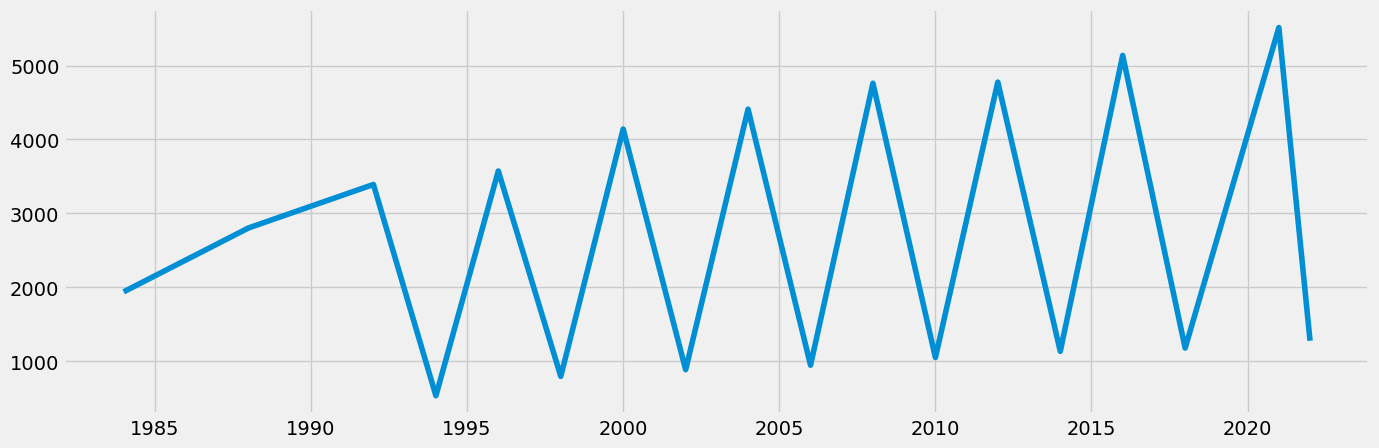

In [42]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_fem40)

In [41]:
# Check Datetime Index

df_fem40.index

DatetimeIndex(['1984-01-01', '1988-01-01', '1992-01-01', '1994-01-01',
               '1996-01-01', '1998-01-01', '2000-01-01', '2002-01-01',
               '2004-01-01', '2006-01-01', '2008-01-01', '2010-01-01',
               '2012-01-01', '2014-01-01', '2016-01-01', '2018-01-01',
               '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [43]:
# Set the frequency of the DatetimeIndex to 'A-DEC' (Annual, ending in December)
df_fem40.index.freq = pd.infer_freq(df_fem40.index)

# Decompose the time series using an additive model (seasonal decomposition)

decomposition = sm.tsa.seasonal_decompose(df_fem40, model='additive', period=2 ) # Set period paramter to '2' as event happens once every two years (Summer Olympics-2 years-Winter Olympics...)

In [44]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

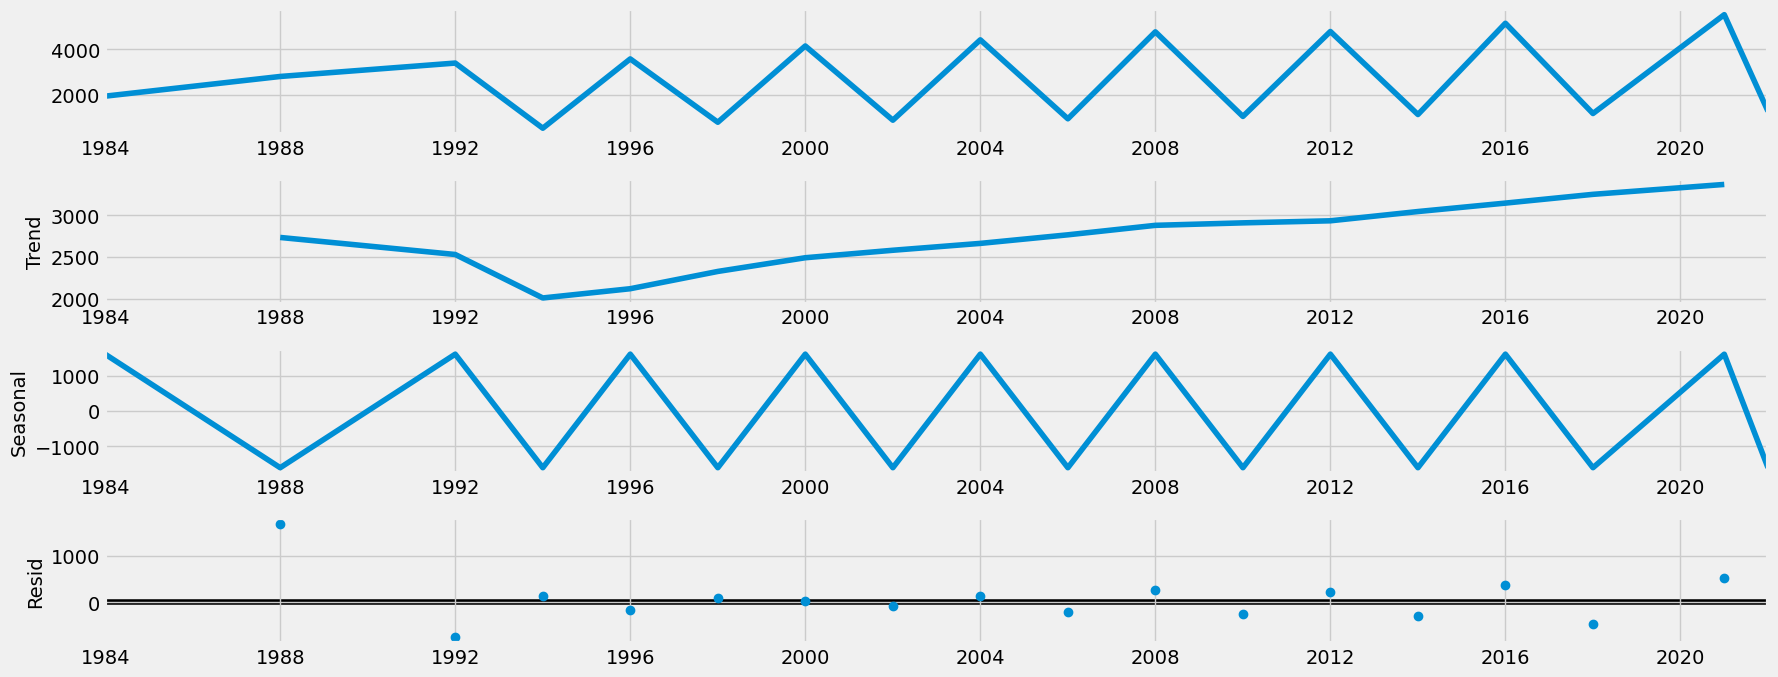

In [45]:
# Plot the separate components

decomposition.plot()
plt.show()

There's an obvious positive dominant trend in the data. As I am pooling Summer and Winter Olympics there's a reocurrence of 1 time very two years and this is reflected in the 'Seasonal' chart. There's also not much unexplained noise, but only towards the end of the analyzed time frame (2022). This also makes sense as data wasn't smoothed.

# 05. Female Athletes / Testing for stationarity

In [46]:
# Import required library to add the adfuller() function

from statsmodels.tsa.stattools import adfuller 

In [48]:
# Run Dickey-Fuller test

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_fem40['count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.376845
p-value                         0.593325
Number of Lags Used             1.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


The test statistic is larger that the critical value (5%). Therefore can't reject null hypothesis (the presence of a unit root). Therefore, this indicates that the data is non-stationary.

# 06. Female Athletes / Testing for autocorrelations

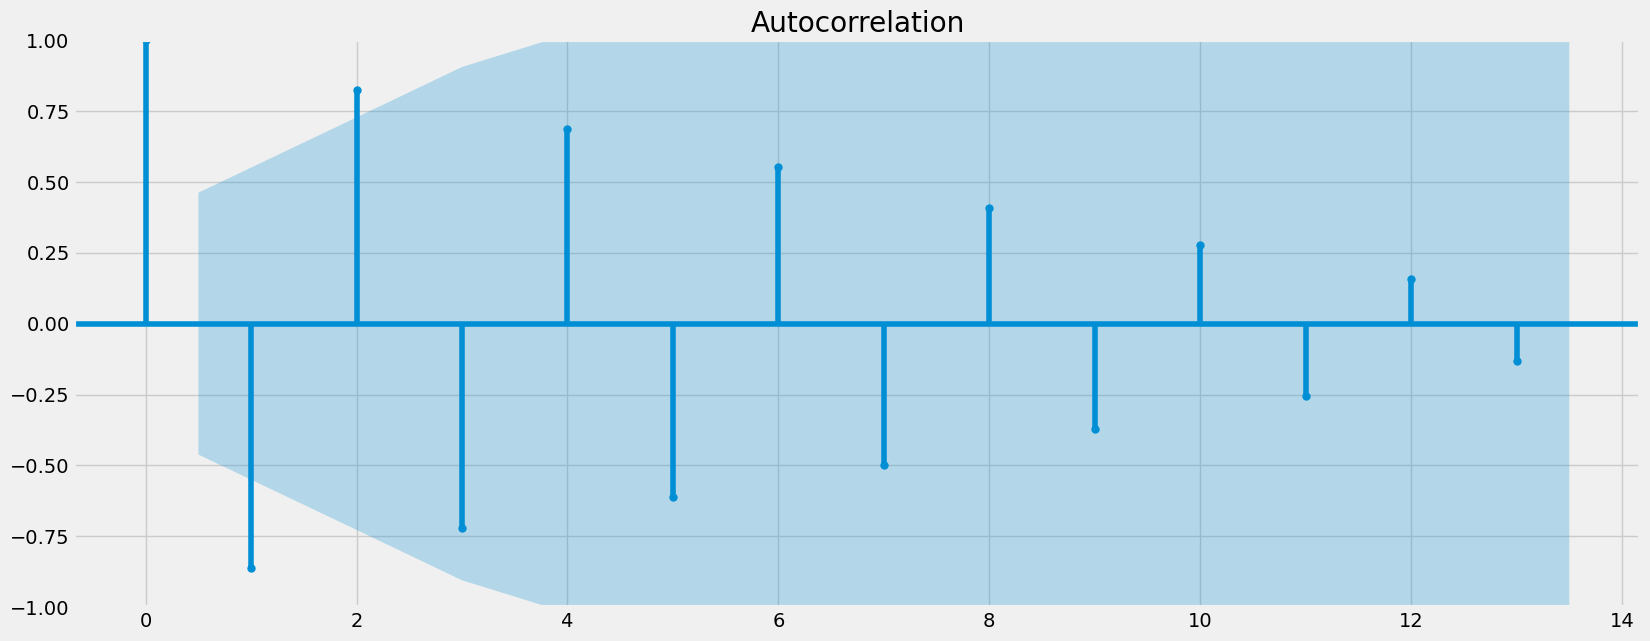

In [49]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_fem40)
plt.show()

# 07. Stationarizing df_fem40

In [50]:
data_diff_fem = df_fem40 - df_fem40.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

# Remove missing values that come as result of differencing
data_diff_fem.dropna(inplace = True)
data_diff_fem.head()

,count
Year,
1988-01-01,864.0
1992-01-01,588.0
1994-01-01,-2858.0
1996-01-01,3040.0
1998-01-01,-2778.0


In [51]:
data_diff_fem.columns

Index(['count'], dtype='object')

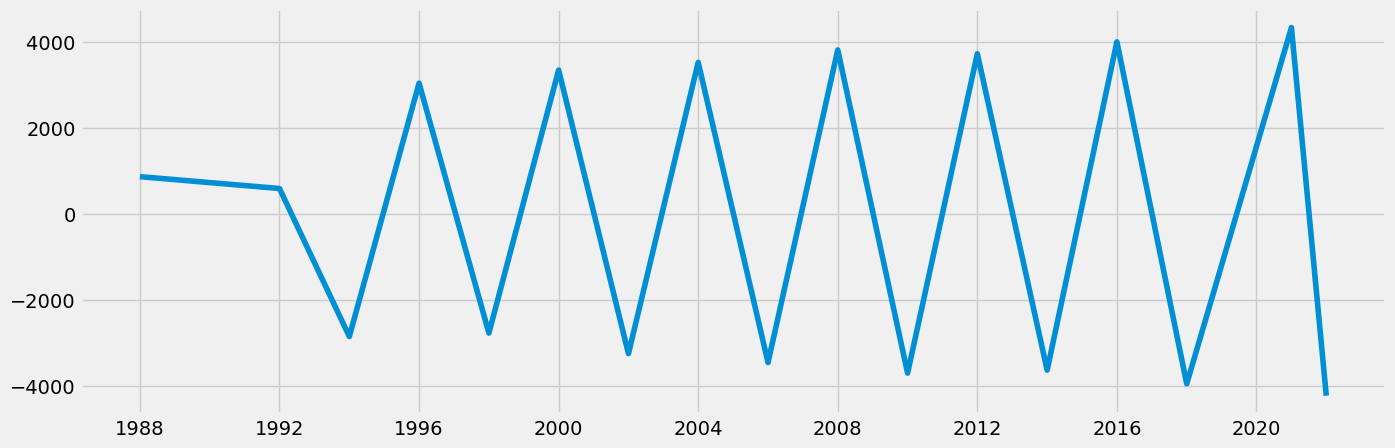

In [52]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_fem)

In [53]:
# Perform Dickey_fuller again

dickey_fuller(data_diff_fem)

Dickey-Fuller Stationarity test:
Test Statistic                -36.222075
p-value                         0.000000
Number of Lags Used             0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


#### This time Test Statistic is way smaller than the critical value. Therefore, it is valid to reject null hypothesis, meaning there's no unit root in data, and the data is stationary. The positive trend is gone, but p-value is 0 which makes me hesitate about this result. 

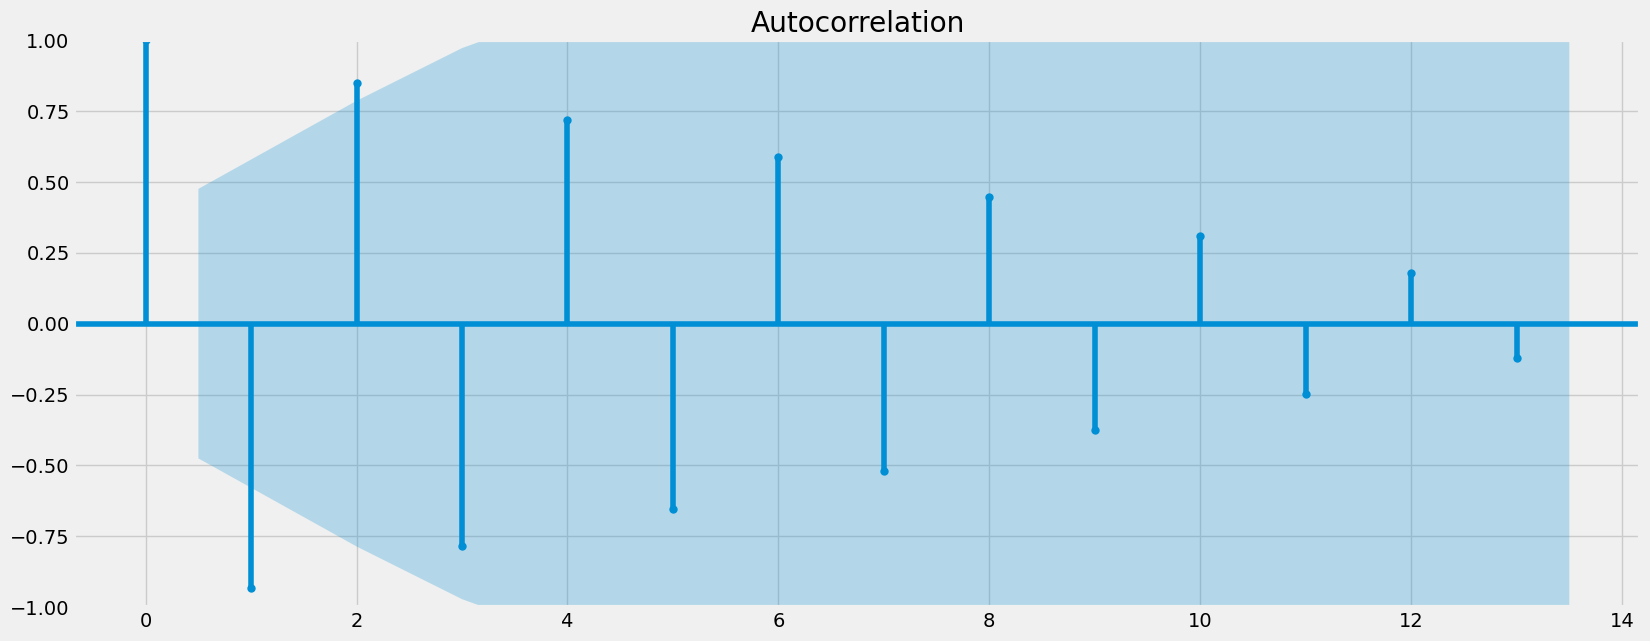

In [54]:
# Testing for autocorrelations again

plot_acf(data_diff_fem)
plt.show()

# 08. Male Athletes / Time-series analysis: decomposition

## Male Athletes

In [55]:
# Convert the 'year' column to datetime with format YYYY

from datetime import datetime

df_male40['Year'] = pd.to_datetime(df_male40['year'], format='%Y')

In [56]:
# Set 'Year' as the index with frequency 'Y' (yearly)

df_male40.set_index('Year', inplace=True)

In [57]:
df_male40.head()

,year,count
Year,,
1984-01-01,1984,6569
1988-01-01,1988,7925
1992-01-01,1992,8481
1994-01-01,1994,1232
1996-01-01,1996,6933


In [58]:
# Drop the 'year' column

df_male40.drop(['year'], axis=1, inplace=True)

In [59]:
# Check output

df_male40.head()

,count
Year,
1984-01-01,6569
1988-01-01,7925
1992-01-01,8481
1994-01-01,1232
1996-01-01,6933


In [60]:
df_fem40.dtypes

count    int64
dtype: object

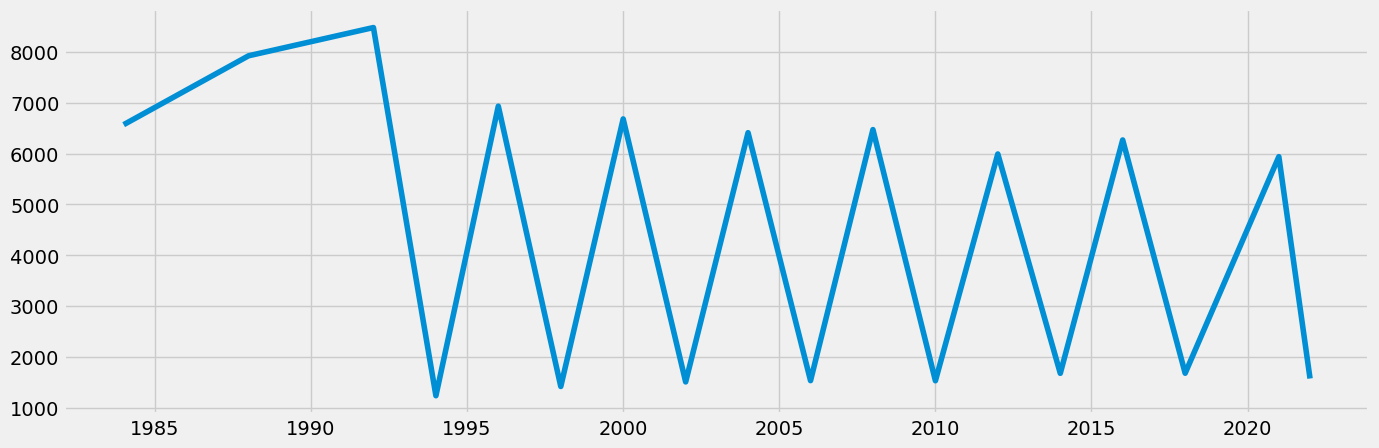

In [61]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_male40)

In [62]:
# Check Datetime Index

df_male40.index

DatetimeIndex(['1984-01-01', '1988-01-01', '1992-01-01', '1994-01-01',
               '1996-01-01', '1998-01-01', '2000-01-01', '2002-01-01',
               '2004-01-01', '2006-01-01', '2008-01-01', '2010-01-01',
               '2012-01-01', '2014-01-01', '2016-01-01', '2018-01-01',
               '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [63]:
# Set the frequency of the DatetimeIndex to 'A-DEC' (Annual, ending in December)
df_male40.index.freq = pd.infer_freq(df_male40.index)

# Decompose the time series using an additive model (seasonal decomposition)

decomposition_male = sm.tsa.seasonal_decompose(df_male40, model='additive', period=2 ) # Set period paramter to '2' as event happens once every two years (Summer Olympics-2 years-Winter Olympics...)

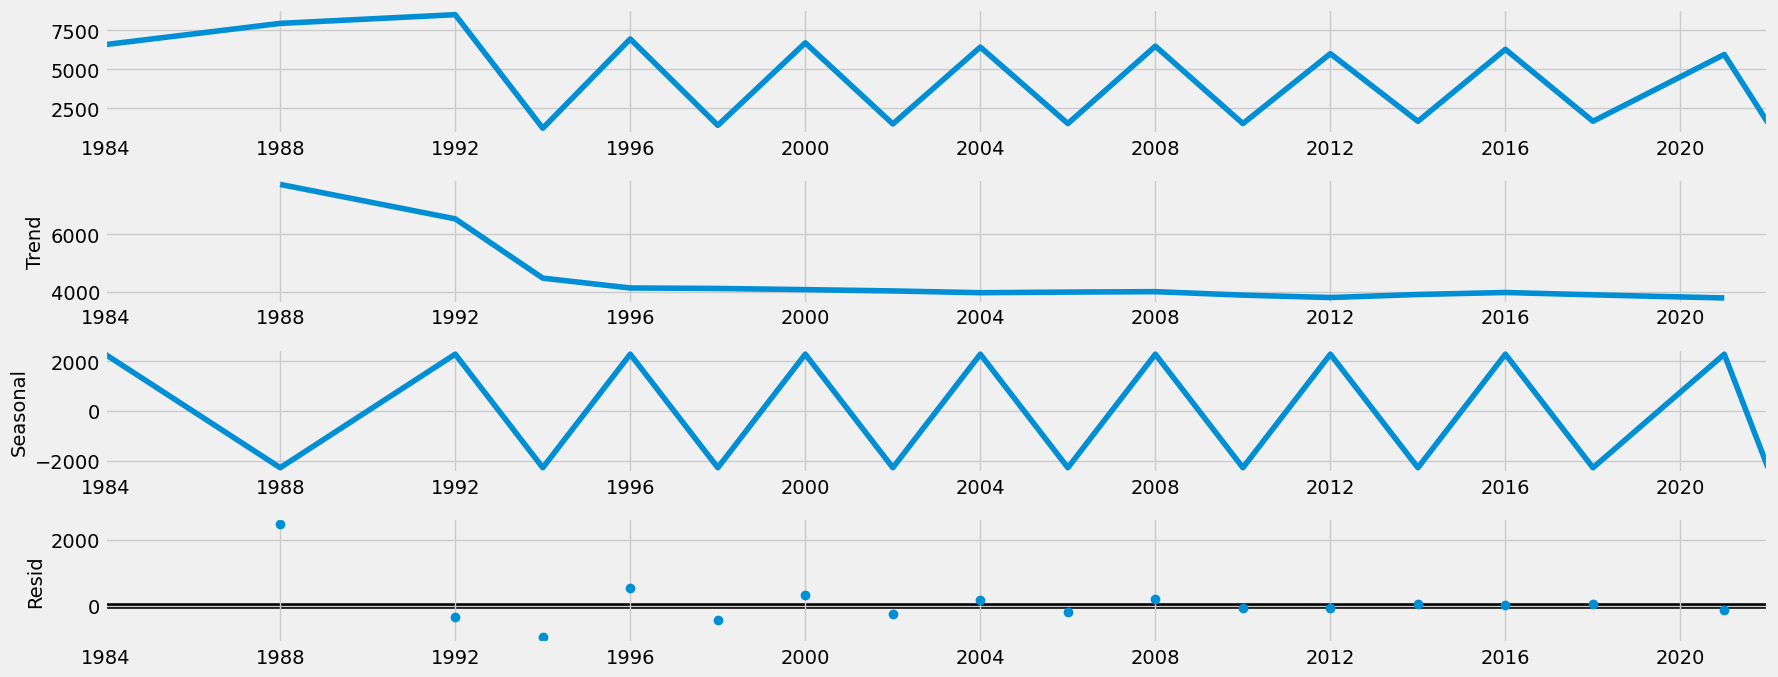

In [64]:
# Plot the separate components

decomposition_male.plot()
plt.show()

Interestingly enough, the number of male athletes in the Olympics is decreasing compared to female athletes, as shown by the negative trend observed in the plot above

# 09. Male Athletes / Testing for stationarity

In [65]:
# Perform Dicker-Fuller test on df_male40

dickey_fuller(df_male40['count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.220917
p-value                         0.664533
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Test Statistic, as expected, is bigger than Critical value, therefore null hypothesis can't be rejected and data is non-stationary

# 10. Male Athletes / Testing for autocorrelations

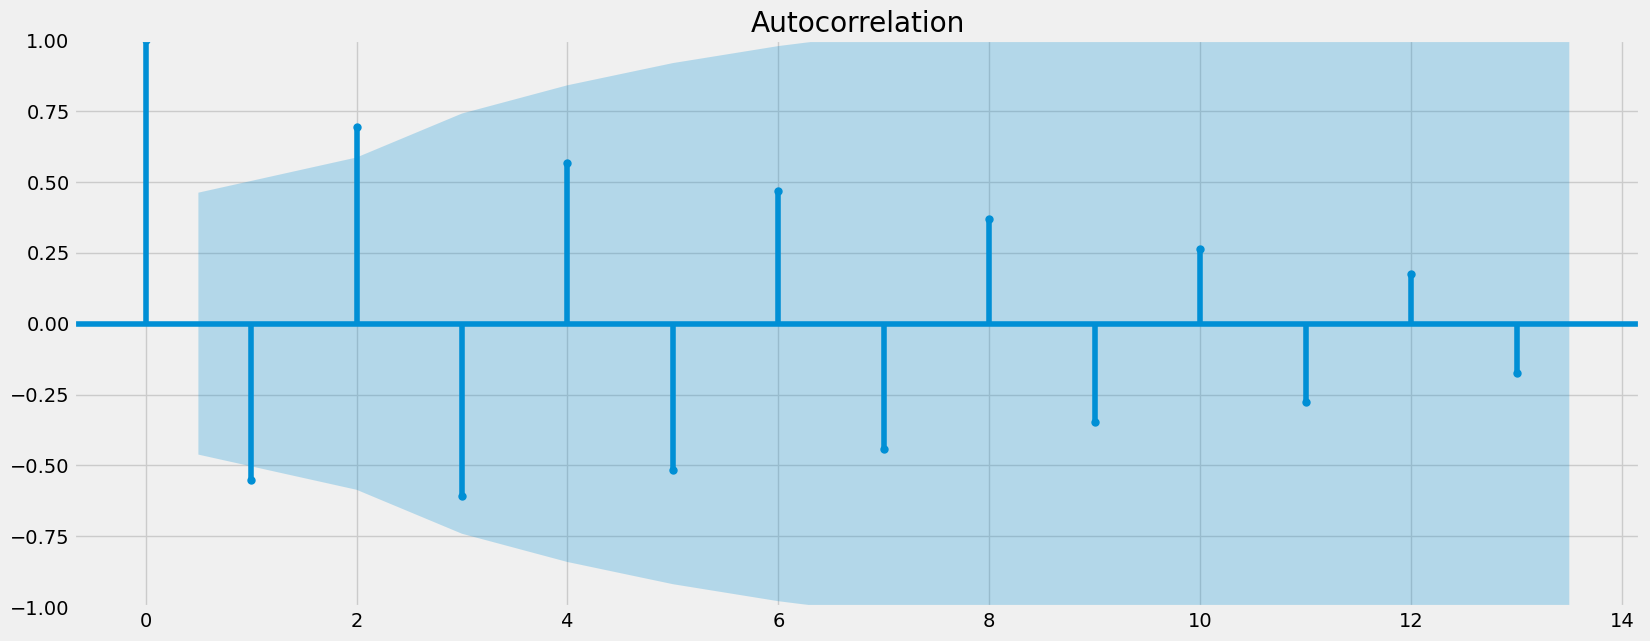

In [66]:
# Check out a plot of autocorrelations

plot_acf(df_male40)
plt.show()

# 11. Stationarizing df_male40

In [67]:
data_diff_male = df_male40 - df_male40.shift(1) 

# Remove missing values that come as result of differencing
data_diff_male.dropna(inplace = True)
data_diff_male.head()

,count
Year,
1988-01-01,1356.0
1992-01-01,556.0
1994-01-01,-7249.0
1996-01-01,5701.0
1998-01-01,-5519.0


In [68]:
data_diff_male.columns

Index(['count'], dtype='object')

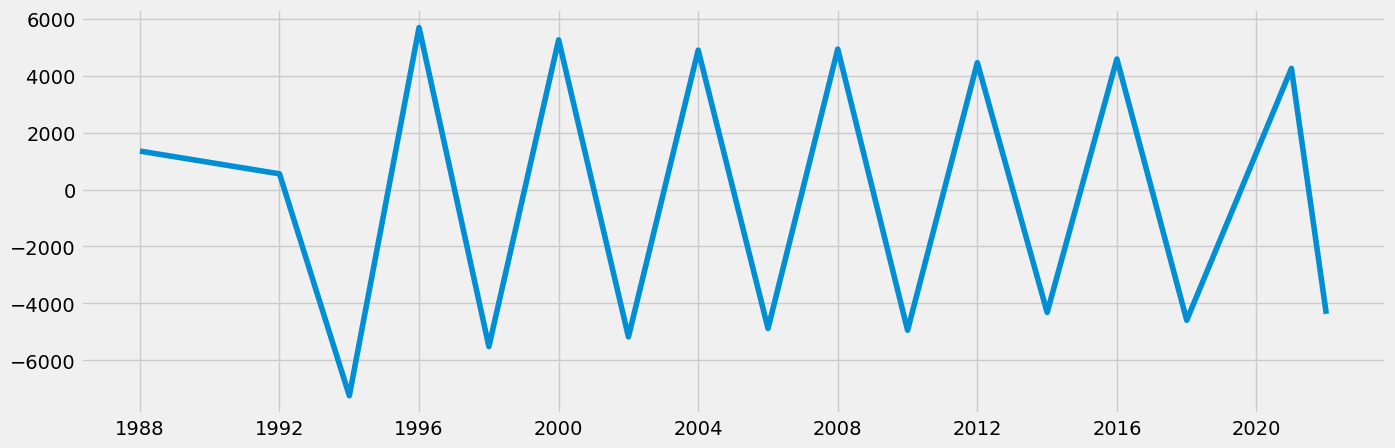

In [69]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_male)

In [70]:
# Perform Dickey_fuller again

dickey_fuller(data_diff_male)

Dickey-Fuller Stationarity test:
Test Statistic                -1.859909e+01
p-value                        2.070029e-30
Number of Lags Used            2.000000e+00
Number of Observations Used    1.400000e+01
Critical Value (1%)           -4.012034e+00
Critical Value (5%)           -3.104184e+00
Critical Value (10%)          -2.690987e+00
dtype: float64


## Data is still non-stationary. Round 2 of stationarization - Log Transformation 1

In [92]:
log_data_1 = np.log(data_diff_male)

In [93]:
# Remove missing values that come as result of differencing

log_data_1.dropna(inplace = True)
log_data_1.head()

,count
Year,
1988-01-01,7.212294
1992-01-01,6.320768
1996-01-01,8.648397
2000-01-01,8.569406
2004-01-01,8.498418


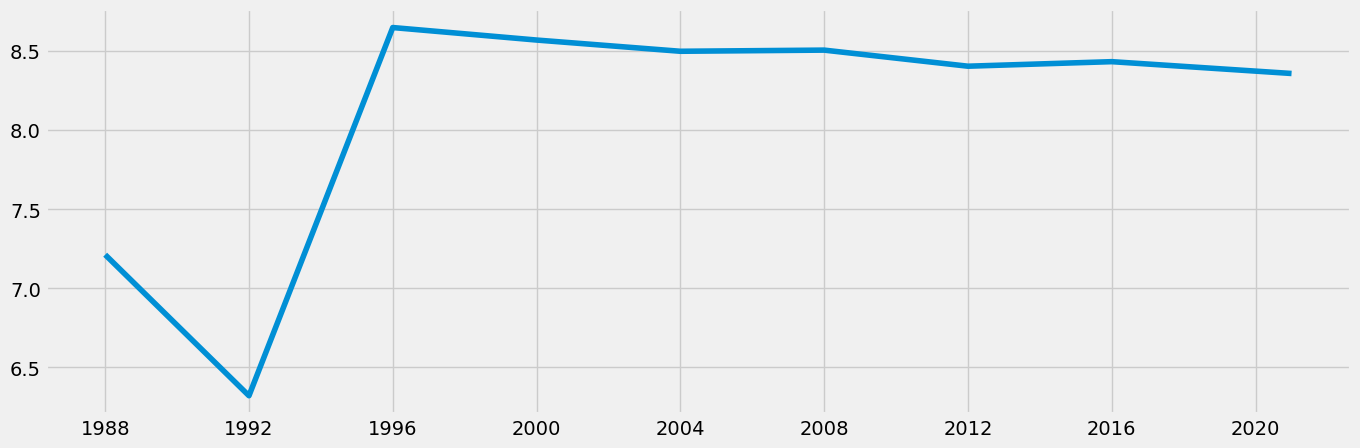

In [94]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(log_data_1)

In [95]:
# Perform Dickey_fuller again(2)

dickey_fuller(log_data_1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.968333
p-value                        0.300628
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


## Data is still non-stationary. Round 3 of stationarization - Differencing 2

In [96]:
data_diff_male2 = log_data_1 - log_data_1.shift(1) 

# Remove missing values that come as result of differencing
data_diff_male2.dropna(inplace = True)
data_diff_male2.head()

,count
Year,
1992-01-01,-0.891526
1996-01-01,2.327629
2000-01-01,-0.078991
2004-01-01,-0.070988
2008-01-01,0.007310


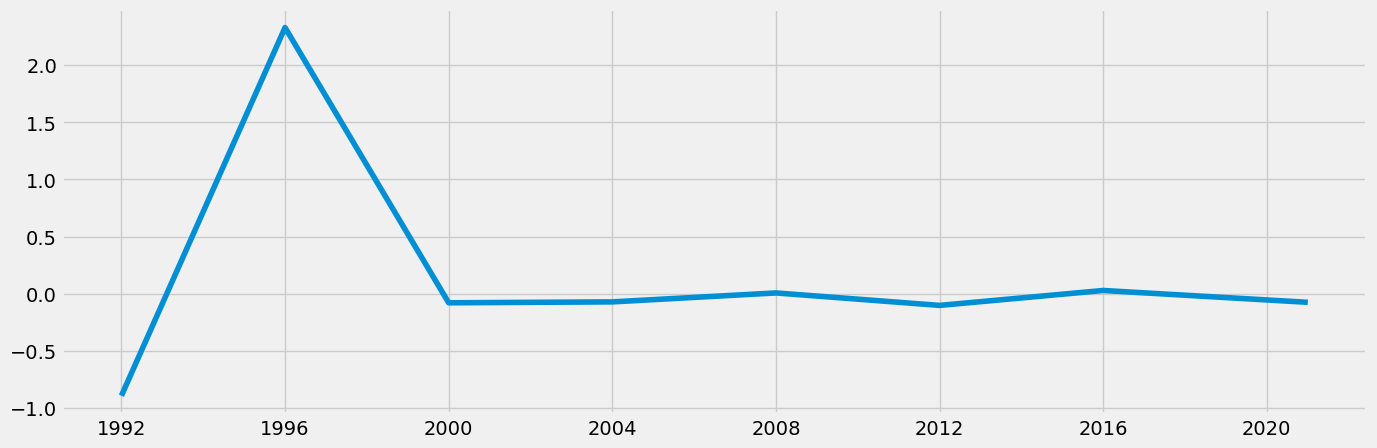

In [97]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_male2)

In [98]:
# Perform Dickey_fuller again(3)

dickey_fuller(data_diff_male2)

Dickey-Fuller Stationarity test:
Test Statistic                -19.250622
p-value                         0.000000
Number of Lags Used             1.000000
Number of Observations Used     6.000000
Critical Value (1%)            -5.354256
Critical Value (5%)            -3.646238
Critical Value (10%)           -2.901198
dtype: float64


After a 3 rounds stationarization (differencing-log transformation-differencing), data has been stationarized successfully.

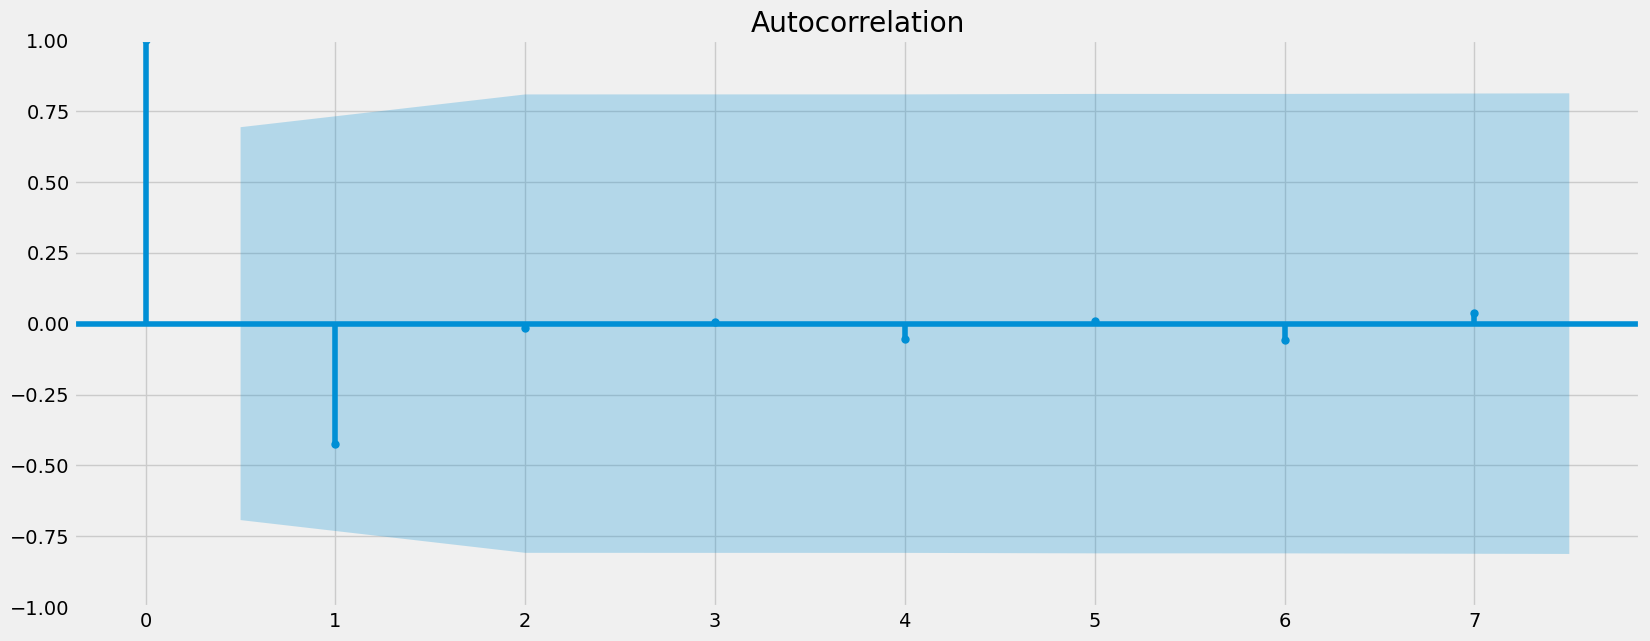

In [99]:
# Check out a plot of autocorrelations

plot_acf(data_diff_male2)
plt.show()